<a href="https://colab.research.google.com/github/Angel-dash/Everything_dataScience/blob/main/TestingMlalgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1818188%2F2965537%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240211%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240211T081056Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D97a70d4dfce46c9719db56cb8de4eb6b9b46b562b4391b7cf3d365ed55ed6d92282ac92e09907bbc9c4f3ccadd222211dc1777d5667be16c0b67678fbf43524733c0a78eaf504ebcca7eefe08b8a6ec4c91925de5ae5365595bb39d95003c8c09f372c50d8c0bc63909f1646a7689b8651ed425fdc0708b8d54db7136554a2d968d88dd2110cf21b6192db9ea1f024d89f36529499b37251e1a55a7295518597bccfd3db7ce6fa5d756e0cf6d2848bfdc6181474271a1e430694bcf350b34f892f6aa4133d17481fb1bc75892c190d57fc934884cae145337b409725cf556ff8801c9c552d022ad7bcdd3172709580b8dfacb40c201679f0b179dfbdb17c670c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22564 bytes downloaded
Downloaded and uncompressed: titanic-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId'])


In [ ]:
# Since Cabin contains both letters and numbers, we're interested in the letters
#df['CabinLetter'] = df['Cabin'].str[0]

In [ ]:
'''
sns.countplot(x='CabinLetter', hue='Pclass', data=df)
plt.title("Distribution of Cabin Letters by Passenger Class")
plt.xlabel("Cabin Letter")
plt.ylabel("Frequency")

'''

'\nsns.countplot(x=\'CabinLetter\', hue=\'Pclass\', data=df)\nplt.title("Distribution of Cabin Letters by Passenger Class")\nplt.xlabel("Cabin Letter")\nplt.ylabel("Frequency")\n\n'

In [ ]:
#df['Cabin'] = df['Cabin'].fillna('N')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.shape

(891, 8)

In [ ]:
df.duplicated().sum()

111

In [ ]:
df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df=df.dropna(subset=['Embarked'])

In [ ]:
df['Age'].dtype

dtype('float64')

In [ ]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

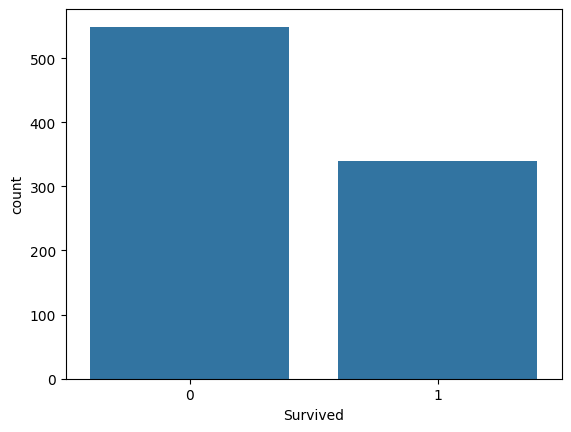

In [ ]:
#Data visualization
sns.countplot(x='Survived',data=df)

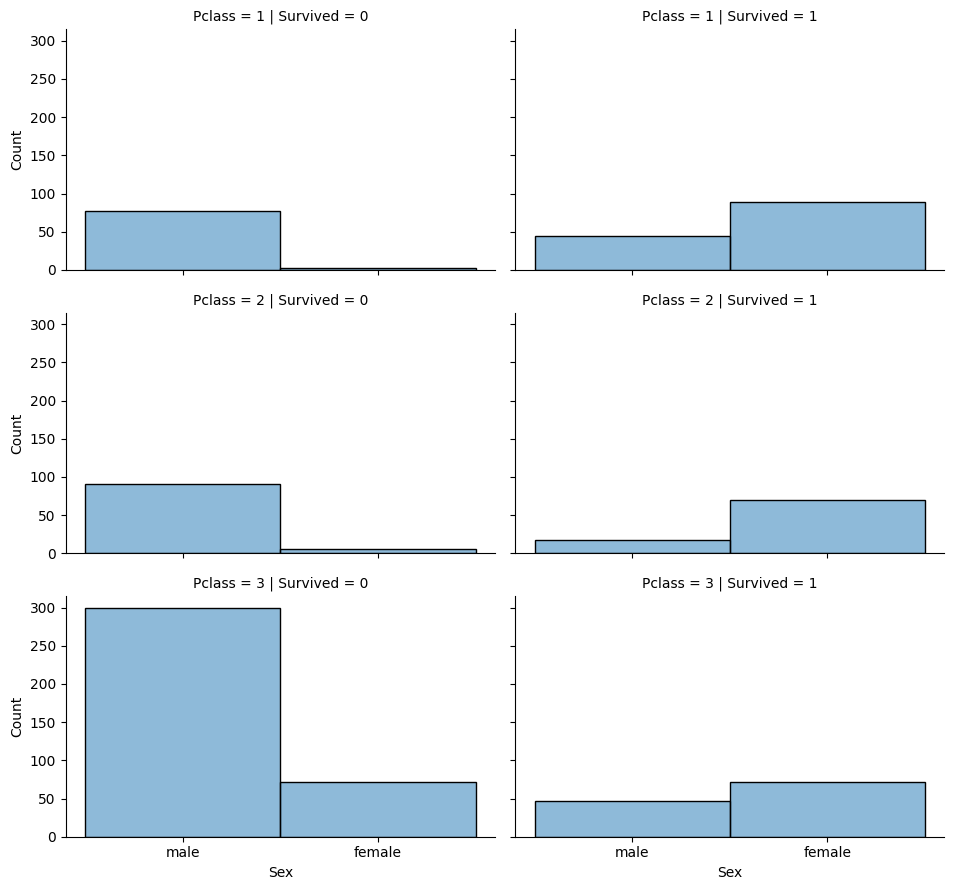

In [ ]:
#plotting FacetGrid
grid = sns.FacetGrid(df, col='Survived', row='Pclass',aspect=1.6)
grid.map(sns.histplot, 'Sex', alpha=.5, bins=20)
grid.add_legend();

<Axes: xlabel='Sex', ylabel='count'>

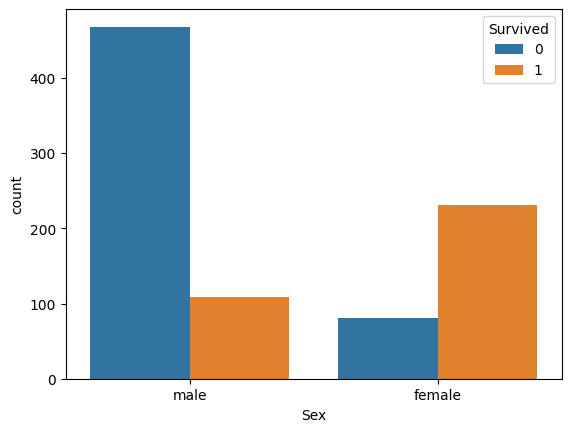

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=df)


The above chart illustrate that male are less likely to surive whereas the surival rate is higher for female

sns.countplot(x="Pclass",hue="Survived",data=df)

AS we can see people who have third class ticket are less likely to survive whereas the people who belonged to higher class has more favourable chance of surviving

In [ ]:

df['Sex'] = df['Sex'].replace({'male':  0, 'female':  1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [ ]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


According to my research not all the people had their own personal cabin. And from the above two chart we can see that the higher class especially class 1 passengers had cabin and on the basis of cabin the chance of surival depends. So people with out cabin will be filled with N== No cabin

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
df.pivot_table(index='Survived',values=['Age','SibSp','Parch','Fare'])



,Age,Fare,Parch,SibSp
Survived,,,,
0,30.402116,22.117887,0.329690,0.553734
1,28.414879,48.209498,0.467647,0.476471


In [ ]:
df.pivot_table(index='Survived',columns='Pclass',values='Fare',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


Model training

In [ ]:
#splitting labeled and features into X and y
X=df.iloc[:,:-1]; y=df.iloc[:,-1]

In [ ]:
X.shape

(889, 7)

In [ ]:
y.shape

(889,)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(711, 7)

In [ ]:
model_lr=LogisticRegression(max_iter=2000)

In [ ]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
Y_predict=model_lr.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train,Y_predict)

0.7215189873417721

In [ ]:
Y_test_predict=model_lr.predict(X_test)

In [ ]:
accuracy_score(y_test,Y_test_predict)

0.7640449438202247

So there seems to be slight underfitting of the model. It may be beacuse of less data

Trying an SVM model

In [ ]:
linear_SVM=LinearSVC()

In [ ]:
linear_SVM.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
y_predict_svm=linear_SVM.predict(X_train)

In [ ]:
accuracy_score(y_predict_svm,y_train)

0.7229254571026723

In [ ]:
y_predict_svm_test=linear_SVM.predict(X_test)

In [ ]:
accuracy_score(y_predict_svm_test,y_test)

0.7303370786516854

Using kernal trick with SVM to see if it can perform better


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')  # 'rbf' stands for Radial Basis Function, a common choice for the kernel
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train=clf.predict(X_train)


In [ ]:
accuracy_score(y_pred,y_test)

0.7191011235955056

In [ ]:
accuracy_score(y_pred_train,y_train)

0.7355836849507735

In [ ]:
#using plynomial kernal for svm
svm_poly=svm.SVC(kernel="poly")
svm_poly.fit(X_train,y_train)
Y_pred_svm_train=svm_poly.predict(X_train)
Y_pred_svm_test=svm_poly.predict(X_test)

In [ ]:
print(f"The training accuracy is {accuracy_score(Y_pred_svm_train,y_train)}")
print(f"The test accuracy is {accuracy_score(Y_pred_svm_test,y_test)}")

The training accuracy is 0.7243319268635724
The test accuracy is 0.7528089887640449


In [ ]:
#using sigmoid kernal for svm
svm_sigmoid=svm.SVC(kernel="sigmoid")
svm_sigmoid.fit(X_train,y_train)
Y_pred_sigmoid_train=svm_sigmoid.predict(X_train)
Y_pred_sigmoid_test=svm_sigmoid.predict(X_test)

In [ ]:
print(f"The training accuracy is {accuracy_score(Y_pred_sigmoid_train,y_train)}")
print(f"The test accuracy is {accuracy_score(Y_pred_sigmoid_test,y_test)}")

The training accuracy is 0.6104078762306611
The test accuracy is 0.601123595505618


From the above resuts we can conclude that linear svm and rbf kernal perform better

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
#Using Decision Tree
DTC=DecisionTreeClassifier(random_state=42,min_samples_leaf=8)
DTC.fit(X_train,y_train)
y_dtc_predict_train=DTC.predict(X_train)
y_dtc_predict_test=DTC.predict(X_test)

In [ ]:
accuracy_score_train=accuracy_score(y_train,y_dtc_predict_train)
accuracy_score_train

0.8579465541490858

In [ ]:
accuracy_score_test=accuracy_score(y_test,y_dtc_predict_test)
accuracy_score_test

0.8314606741573034

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(3,  10),
    'min_samples_split': range(2,  40),
    'min_samples_leaf': range(1,  10),
    'ccp_alpha': [0.001,  0.005, 0.01,  0.1,0.015]  # Cost Complexity Pruning parameter
}
dtc = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a new model with the best parameters
best_dtc = DecisionTreeClassifier(**best_params, random_state=42)
best_dtc.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train = best_dtc.predict(X_train)
y_pred_test = best_dtc.predict(X_test)

In [ ]:
# Assuming grid_search is your GridSearchCV object that has been fit to the data
print(grid_search.best_params_)


{'ccp_alpha': 0.001, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 12}


In [ ]:
accuracy_score(y_train,y_pred_train)

0.8452883263009845

In [ ]:
accuracy_score(y_test,y_pred_test)

0.8314606741573034

we can see there is clearly overfitting of the model


Hyper parameters to solve the overfitting
min_samples_split=32 ma 84/84 auxxa with max_depth 8
min_samples_leaf 7 ma with depth 7 84/84

In [ ]:
#Using max_depth
DTC_md = DecisionTreeClassifier(max_depth=7,min_samples_leaf=7,min_samples_split=12, random_state=42)
DTC_md.fit(X_train,y_train)
y_dtc_md_train=DTC_md.predict(X_train)
y_dtc_md_test=DTC_md.predict(X_test)


In [ ]:
accuracy_score(y_train,y_dtc_md_train)

0.849507735583685

In [ ]:
accuracy_score(y_test,y_dtc_md_test)

0.8426966292134831

In [ ]:
#Using min_sample_split #pruning
DTC_pr = DecisionTreeClassifier(criterion="entropy",min_samples_split=35, random_state=42)
DTC_pr.fit(X_train,y_train)
y_dtc_pr_train=DTC_pr.predict(X_train)
y_dtc_pr_test=DTC_pr.predict(X_test)

In [ ]:
accuracy_score(y_train,y_dtc_pr_train)

0.8523206751054853

In [ ]:
accuracy_score(y_test,y_dtc_pr_test)

0.8258426966292135

In [ ]:
#Using min_sample_split #pruning
DTC_leaf = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=15, random_state=42)
DTC_leaf.fit(X_train,y_train)
y_dtc_lf_train=DTC_leaf.predict(X_train)
y_dtc_lf_test=DTC_leaf.predict(X_test)

In [ ]:
accuracy_score(y_train,y_dtc_lf_train)

0.8368495077355836

In [ ]:
accuracy_score(y_test,y_dtc_lf_test)

0.7865168539325843